In [2]:
import pandas as pd

df = pd.read_csv("ipl_2022_deliveries.csv")

df.head()

,match_id,season,match_no,date,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
0,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.1,Gaikwad,Umesh Yadav,0,1,0,0,0,1,NaN,NaN,NaN
1,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.1,Gaikwad,Umesh Yadav,0,0,0,0,0,0,NaN,NaN,NaN
2,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.2,Gaikwad,Umesh Yadav,0,1,1,0,0,0,NaN,NaN,NaN
3,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.2,Gaikwad,Umesh Yadav,0,0,0,0,0,0,NaN,NaN,NaN
4,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.3,Gaikwad,Umesh Yadav,0,0,0,0,0,0,caught,Gaikwad,Nitish Rana


In [4]:
# Total runs scored by each batsman
batsman_runs = df.groupby("striker")["runs_of_bat"].sum().reset_index()

# Balls faced
balls_faced = df.groupby("striker").size().reset_index(name="balls")

# Merge
batting_stats = batsman_runs.merge(balls_faced, on="striker")

# Strike rate
batting_stats["strike_rate"] = (
    batting_stats["runs_of_bat"] / batting_stats["balls"] * 100
)

batting_stats.head()

,striker,runs_of_bat,balls,strike_rate
0,Abbott,7,5,140.000000
1,Abdul Samad,4,7,57.142857
2,Abhijeet Tomar,4,8,50.000000
3,Abhinav Manohar,108,79,136.708861
4,Abhishek Sharma,426,329,129.483283


In [20]:
# Sort by runs + strike rate
top_batsmen = batting_stats.sort_values(
    ["runs_of_bat","strike_rate"], ascending=False
)

top_batsmen.head(11)

,striker,runs_of_bat,balls,strike_rate
22,Buttler,863,596,144.798658
110,Rahul,616,472,130.508475
171,de Kock,508,350,145.142857
40,Hardik Pandya,487,387,125.839793
144,Shubman Gill,483,374,129.144385
80,Miller,481,348,138.218391
172,du Plessis,468,377,124.137931
31,Dhawan,460,395,116.455696
129,Samson,458,321,142.679128
48,Hooda,451,340,132.647059


In [8]:
# Runs conceded
runs_conceded = df.groupby("bowler")["runs_of_bat"].sum().reset_index()

# Balls bowled
balls_bowled = df.groupby("bowler").size().reset_index(name="balls")

# Merge
bowling_stats = runs_conceded.merge(balls_bowled, on="bowler")

# Economy rate
bowling_stats["economy"] = (
    bowling_stats["runs_of_bat"] / (bowling_stats["balls"]/6)
)

bowling_stats.head()

,bowler,runs_of_bat,balls,economy
0,Aaron,49,33,8.909091
1,Abbott,44,27,9.777778
2,Abdul Samad,8,6,8.000000
3,Abhishek Sharma,38,24,9.500000
4,Akash Deep,199,119,10.033613


In [18]:
best_bowlers = bowling_stats.sort_values("economy")

best_bowlers.head(11)

,bowler,runs_of_bat,balls,economy
59,Matheesha Pathirana,41,48,5.125000
69,Narine,305,342,5.350877
65,Mohsin Khan,185,206,5.388350
12,Ayush Badoni,11,12,5.500000
108,Solanki,38,36,6.333333
64,Moeen Ali,155,146,6.369863
85,Rashid Khan,414,386,6.435233
113,Tilak Varma,13,12,6.500000
14,Bhuvneshwar,358,330,6.509091
123,Willey,72,66,6.545455


In [12]:
best_xi_batsmen = top_batsmen.head(6)
best_xi_bowlers = best_bowlers.head(5)

print("Best XI Batsmen:")
print(best_xi_batsmen["striker"])

print("\nBest XI Bowlers:")
print(best_xi_bowlers["bowler"])

Best XI Batsmen:
22           Buttler
110            Rahul
171          de Kock
40     Hardik Pandya
144     Shubman Gill
80            Miller
Name: striker, dtype: object

Best XI Bowlers:
59     Matheesha Pathirana
69                  Narine
65             Mohsin Khan
12            Ayush Badoni
108                Solanki
Name: bowler, dtype: object


In [14]:
# Top 6 batsmen (runs + strike rate)
best_xi_batsmen = top_batsmen.head(6)

# Top 5 bowlers (lowest economy)
best_xi_bowlers = best_bowlers.head(5)

print("🏏 Best XI Batsmen")
print(best_xi_batsmen["striker"])

print("\n🎯 Best XI Bowlers")
print(best_xi_bowlers["bowler"])

🏏 Best XI Batsmen
22           Buttler
110            Rahul
171          de Kock
40     Hardik Pandya
144     Shubman Gill
80            Miller
Name: striker, dtype: object

🎯 Best XI Bowlers
59     Matheesha Pathirana
69                  Narine
65             Mohsin Khan
12            Ayush Badoni
108                Solanki
Name: bowler, dtype: object


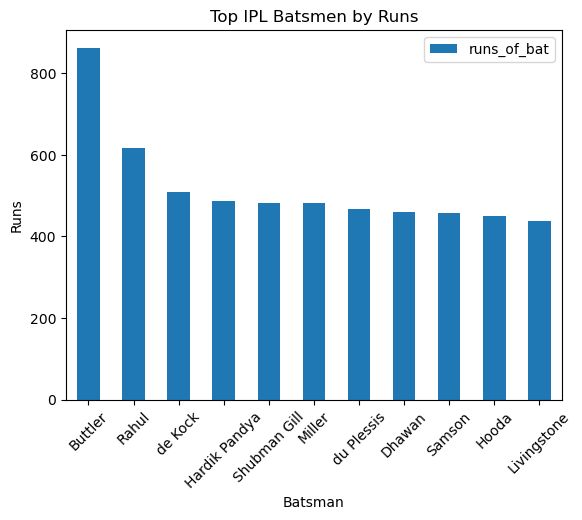

In [22]:
import matplotlib.pyplot as plt

# Top batsmen runs chart
top_batsmen.head(11).plot(
    kind="bar",
    x="striker",
    y="runs_of_bat"
)

plt.title("Top IPL Batsmen by Runs")
plt.xlabel("Batsman")
plt.ylabel("Runs")
plt.xticks(rotation=45)
plt.show()

In [26]:
# Convert to lists
batsmen_list = list(best_xi_batsmen["striker"])
bowlers_list = list(best_xi_bowlers["bowler"])

# Make both lists same length
max_len = max(len(batsmen_list), len(bowlers_list))

batsmen_list += [""] * (max_len - len(batsmen_list))
bowlers_list += [""] * (max_len - len(bowlers_list))

# Create table
best_xi = pd.DataFrame({
    "Batsmen": batsmen_list,
    "Bowlers": bowlers_list
})

best_xi

,Batsmen,Bowlers
0,Buttler,Matheesha Pathirana
1,Rahul,Narine
2,de Kock,Mohsin Khan
3,Hardik Pandya,Ayush Badoni
4,Shubman Gill,Solanki
5,Miller,


In [30]:
print(" IPL BEST XI (Data-Driven Selection)\n")

print(" Batsmen:")
for i, player in enumerate(best_xi["Batsmen"], start=1):
    if player != "":
        print(f"{i}. {player}")

print("\n Bowlers:")
for i, player in enumerate(best_xi["Bowlers"], start=1):
    if player != "":
        print(f"{i}. {player}")

 IPL BEST XI (Data-Driven Selection)

 Batsmen:
1. Buttler
2. Rahul
3. de Kock
4. Hardik Pandya
5. Shubman Gill
6. Miller

 Bowlers:
1. Matheesha Pathirana
2. Narine
3. Mohsin Khan
4. Ayush Badoni
5. Solanki


## Final Summary

This project demonstrates data-driven team selection using IPL performance metrics.

Selection criteria:
- Batsmen: Total runs + strike rate
- Bowlers: Economy rate

The approach shows how cricket analytics can support objective team selection decisions.